# Lab 4

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-4](https://yuanyuyuan.github.io/itcm/lab-4.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 11/20(Wed.)**

In [1]:
name = "蔡子暘"
student_id = "B07201025"

---

# Exercise 1.  Finite Difference
---

### Part 0.

#### Import necessary libraries. Note that diags library from scipy is used to construct the differentiation matrix below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

---

### Part 1. 

#### Given a function $u(x)$ which we want to find its derivative with numerical methods.

#### Consider a uniform grid partitioning $x$ into $\{x_1, x_2, \dots, x_n\}$ with grid size $\Delta x=x_{j+1}-x_j, j\in \{1, 2, \dots, n\}$, and a set of corresponding data values $U=\{U_1, U_2, \dots, U_n\}$, where 
#### $$U_{j+k} = u(x_j + k \Delta x) = u(x_{j+k}), j\in \{1, 2, \dots, n\}.$$

#### We want to use one-sided finite-difference formula 

#### $$\alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}$$

#### to approximate the derivative of $u$ at all the points $x_j, j\in \{1, 2, \dots, n\}$, that is

#### $$u'(x_j) \approx W_j \triangleq \alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}.$$

---

#### Part 1.1

Find the coefficients $\alpha_j$ for $j=1,2,3$ which make the stencil above accurate for as high degree polynomials as possible.

Write down your derivation in detail with Markdown/LaTeX.

$$\begin{aligned}
    U_j &= u(x_j)\\
    U_{j+1} &= u(x_j) + \Delta xu'(x_j) + \frac{(\Delta x)^2}{2}u''(x_j) + O(\Delta x^3)\\
    U_{j+2} &= u(x_j) + 2\Delta xu'(x_j) + 2(\Delta x)^2 u''(x_j) + O(\Delta x^3)\\
\end{aligned}$$ 
So we can deduce equations of $\alpha_1,\alpha_2,\alpha_3$:
$$\begin{aligned}
    \alpha_1+\alpha_2+\alpha_3=0 \\
    \alpha_2+2\alpha_3=\frac{1}{\Delta x} \\
    \frac{\alpha_2}{2}+2\alpha_3=0
\end{aligned}$$ 
Thus $\alpha_1=\frac{-3}{2\Delta x},\alpha_2=\frac{2}{\Delta x},\alpha_3=\frac{-1}{2\Delta x}$

#### Part 1.2

Fill in the tuple variable `alpha` of lenght 3 with your answer above. (Suppose $\Delta x=1$)

In [3]:
alpha = [-1.5,2,-0.5]

In [4]:
print('My alpha =', alpha)

My alpha = [-1.5, 2, -0.5]


---

### Part 2.

#### Suppose we use the finite-difference formula above to approximate and assume the problem is periodic, i.e. take $U_0=U_n$, $U_1=U_{n+1}$, and so on. 

#### Find the differentiation matrix $D$ so that the numerical differentiation problem can be represented as a matrix-vector multiplication $W \triangleq DU$, where $D \in \mathbb{R}^{n \times n}$, $U \in \mathbb{R}^{n}$, and $W \in \mathbb{R}^n$.

---

#### Part 2.1

Complete the following function to construct the desired differentiation matrix under the __periodic boundary condition__ with given number of partition $n$, coefficients of 3-point finite-difference formula $\alpha$, and mesh size $\Delta x$.

In [9]:
def construct_differentiation_matrix(n, alpha, delta_x):
    diagonals = [
        alpha[0] * np.ones(n),
        alpha[1] * np.ones(n-1),
        alpha[2] * np.ones(n-2),
        alpha[1] * np.ones(1),
        alpha[2] * np.ones(2)
    ]
    D = diags(diagonals, offsets=[0, 1, 2,-n+1,-n+2])
    D /= delta_x

    return D

#### Part 2.2

Print and check your implementation.

In [10]:
print("For n = 8 and mesh size 1, D in dense form is")
sparse_D = construct_differentiation_matrix(8, alpha, 1)
dense_D = sparse_D.toarray()
print(dense_D)

For n = 8 and mesh size 1, D in dense form is
[[-1.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.  -1.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -1.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.  -1.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -1.5  2.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -1.5  2.  -0.5]
 [-0.5  0.   0.   0.   0.   0.  -1.5  2. ]
 [ 2.  -0.5  0.   0.   0.   0.   0.  -1.5]]


---

### Part 3.


#### Take $u(x)=e^{\sin x}$ on the domain $[-\pi, \pi]$.  Find the finite difference approximation $W$ for $\{u'(x_j)\}^{n}_{j=1}$ for various values of $n=2^{k}$, $k=3,4,\dots,10$, and analyze the errors.

---

#### Part 3.1

Define the functinos $u$ and $u'(x)$.

In [7]:
def u(x):
    return np.e**(np.sin(x))
def d_u(x):
    return np.cos(x)*np.e**(np.sin(x))

Plot and check the functions

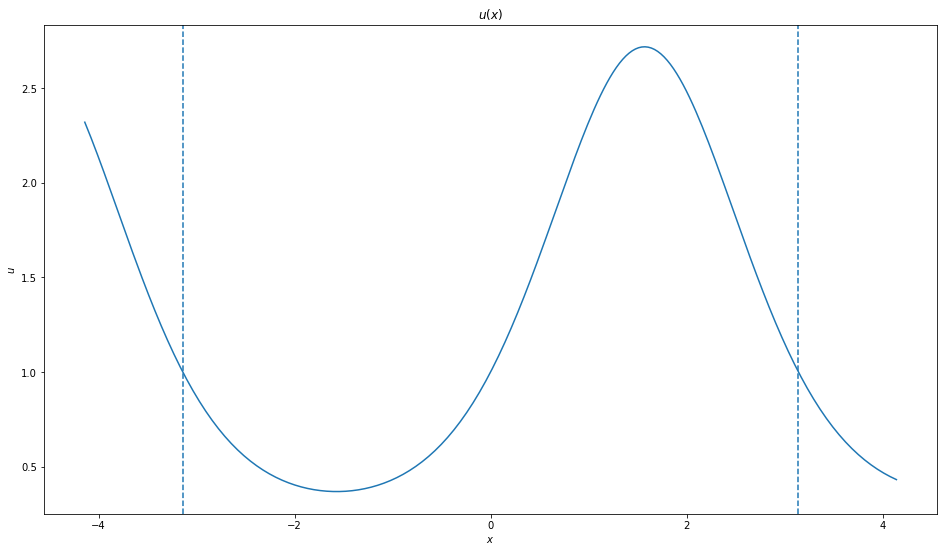

In [8]:
x_range = np.linspace(-np.pi-1, np.pi+1, 2**8)
plt.figure(figsize=(16, 9))
plt.plot(x_range, u(x_range))
plt.axvline(x=np.pi, linestyle='--')
plt.axvline(x=-np.pi, linestyle='--')
plt.ylabel(r'$u$')
plt.xlabel(r'$x$')
plt.title(r'$u(x)$')
plt.show()

#### Part 3.2

Plot the $u'$ and $W$ together for each point $x_j, j \in \{1, 2, \dots, n\}$ with $n=2^k, k\in \{3, 4, \dots, 10\}$. Note that there're total 8 figures to be plotted. And you need to compute the error, display them in the plots, and store them into the list variable `error_list` for further analysis below.

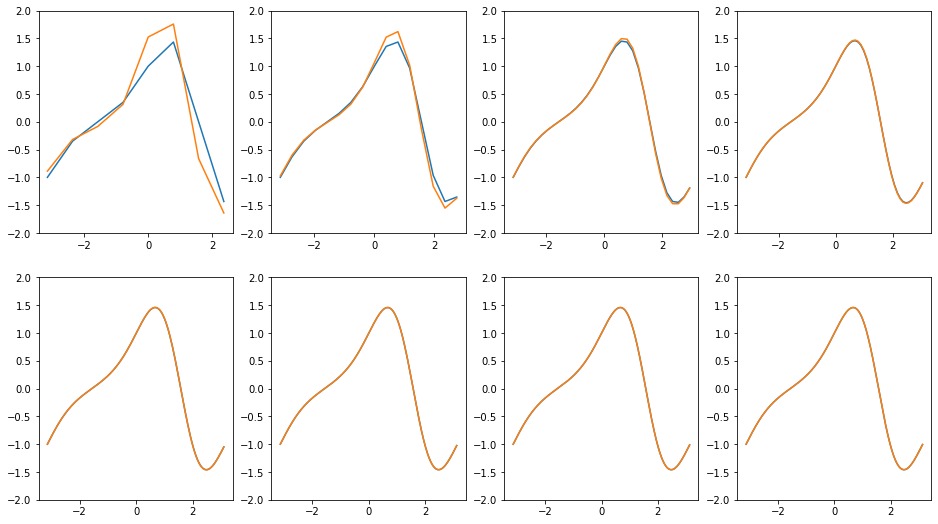

In [19]:
error_list = []
fig, axes = plt.subplots(2, 4, figsize=(16,9))
for idx, ax in enumerate(axes.flatten()):
    k=idx+3
    n=2**k
    x=np.linspace(-np.pi,np.pi,n, endpoint=False)
    D=construct_differentiation_matrix(n, alpha, 2*np.pi/n)
    W=D@u(x)
    error=np.abs(d_u(x)-W)
    error_list.append(error)
    ax.set_ylim([-2,2])
    ax.plot(x,d_u(x))
    ax.plot(x,W)

Plot the `error_list` with respect to $k=3, 4, \dots, 10$ in log scale to show the error behavior.

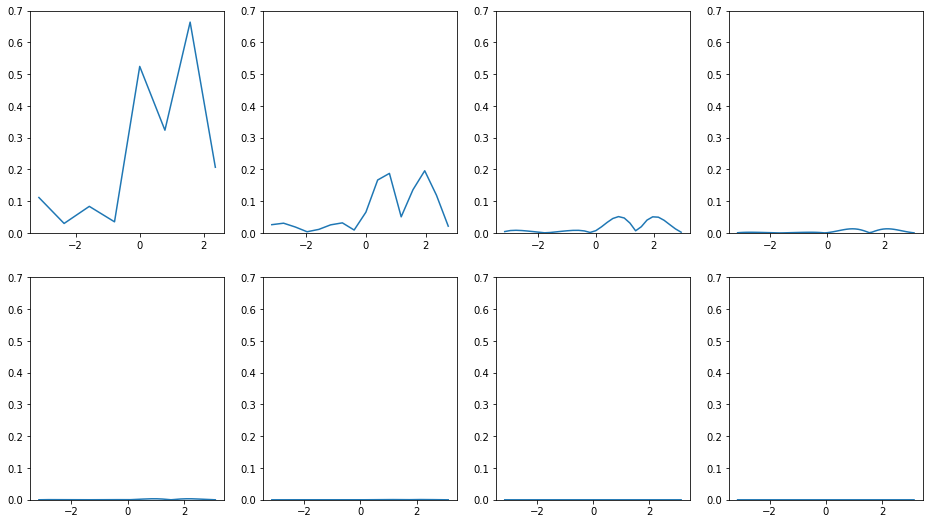

In [31]:
error_list = []
fig, axes = plt.subplots(2, 4, figsize=(16,9))
for idx, ax in enumerate(axes.flatten()):
    k=idx+3
    n=2**k
    x=np.linspace(-np.pi,np.pi,n, endpoint=False)
    D=construct_differentiation_matrix(n, alpha, 2*np.pi/n)
    W=D@u(x)
    error=np.abs(d_u(x)-W)
    error_list.append(np.log(error))
    ax.set_ylim([0,0.7])
    ax.plot(x,error)

#### Part 3.3

From the figure above, what rates of convergence do you observe as $\Delta x \to 0$?

It converges with the rate of $O(\Delta x^2)$